<a href="https://colab.research.google.com/github/Avifahdwicahyani/PCVK_Ganjil_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Feature Matching, Face Detection, Face Tracking**

- Avifah Dwi Cahyani
- 2141720053

**Praktikum**

**A. Tujuan**
- Mahasiswa mampu memahami konsep Feature Matching
- Mahasiswa mampu memahami konsep face detection
- Mahasiswa dapat mengimplementasikan beberapa metode dalam proses Feature Matching dan Face detection menggunakan Python pada Google Colab

**B. Alat dan Bahan**

1. PC/LAPTOP
2. Github
3. *Google Colaborator*

**C. Dasar Teori**

**C.1 Konsep Feature Matching**

Feature matching melakukan ekstraksi ekstraksi fitur penting dari sebuah citra menggunakan ide
dasar dari corner, edge, dan contour detection. Selanjutnya akan dilakukan perhitungan distance
untuk mencari kecocokan antara image sumber dengan image template. Dengan menggunakan cara
ini, anda tidak perlu lagi menggunakan template yang ada di image sumber. Jika objek pada citra
template tidak berukuran sama dengan citra sumber, deteksi tetap bisa dilakukan dengan baik. Pada
praktikum kali ini akan dicobakan 2 metode Feature Matching yaitu:

1. Brute-Force Matching menggunakan ORB Descriptor (Orient FAST and Rotated BRIEF)
2. Brute-Force Matching menggunakan SIFT Descriptor dan Test Ratio (Scale-Invariant Feature
Transform)

ORB adalah berasal dari "OpenCV Labs". Algoritma ini diajukan oleh Ethan Rublee, Vincent
Rabaud, Kurt Konolige dan Gary R. Bradski dalam artikel mereka berjudul “ORB: An efficient alternative
to SIFT or SURF” pada tahun 2011. Seperti yang tertulis pada judulnya, ORB adalah alternatif pengganti
dari SIFT dan SURF dalam hal biaya komputasi, kinerja matching dan terutama adalah paten. SIFT dan
SURF dipatenkan dan kita harus membayar untuk menggunakannya, beda dengan ORB yang tidak
perlu membayar untuk penggunaannya.

ORB pada dasarnya adalah perpaduan dari detektor keypoint FAST dan deskriptor BRIEF dengan
banyak modifikasi untuk meningkatkan kinerjanya. Sebagai langkah awal, FAST digunakan untuk
menemukan keypoint, lalu Harris Corner detection digunakan untuk mencari N-point tertinggi. Akan
tetapi FAST tidak menghitung orientasinya. Modifikasi dilakukan agar algoritma ini invariant terhadap
orientasi. Penjelasan lebih detil dapat dilihat pada dokumentasi OpenCV:
https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html

ORB Descriptor telah disediakan pada library Opencv cv.ORB(). Berikut adalah code untuk
menunjukkan penggunakan ORB Descriptor. Pada praktikum ini anda diminta untuk menggunakan file
reeses_puff dan cereals yang telah disediakan. Perhatikan pada 2 gambar tersebut, reeses puff
memiliki resolusi yang lebih besar daripada reeses puff pada image cereals.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

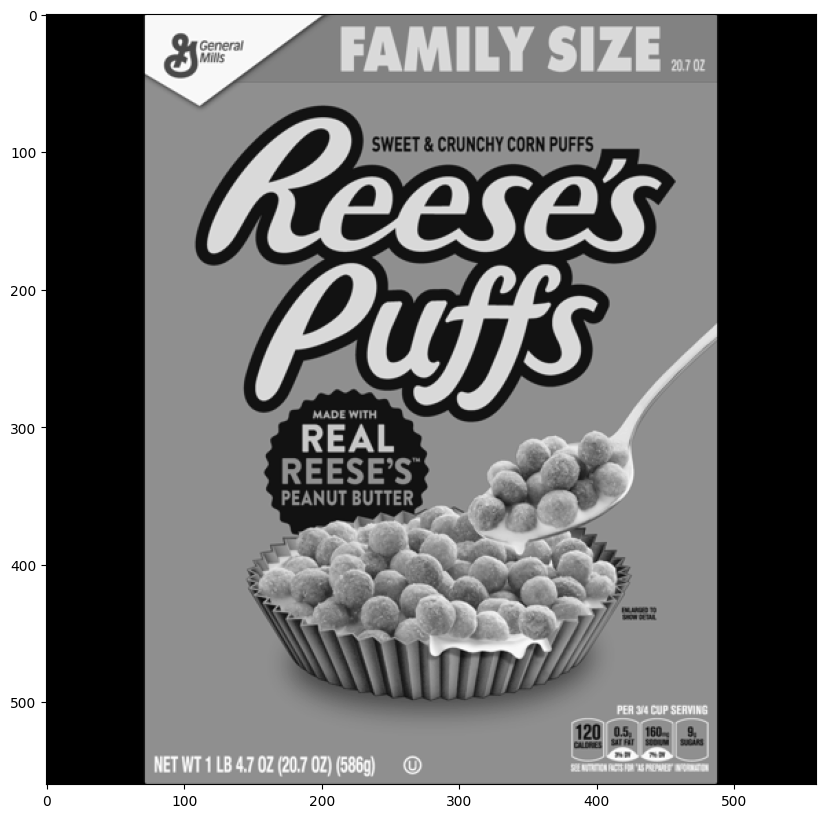

In [ ]:
reeses = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/facedet/reeses_puffs.png',0)
display(reeses)

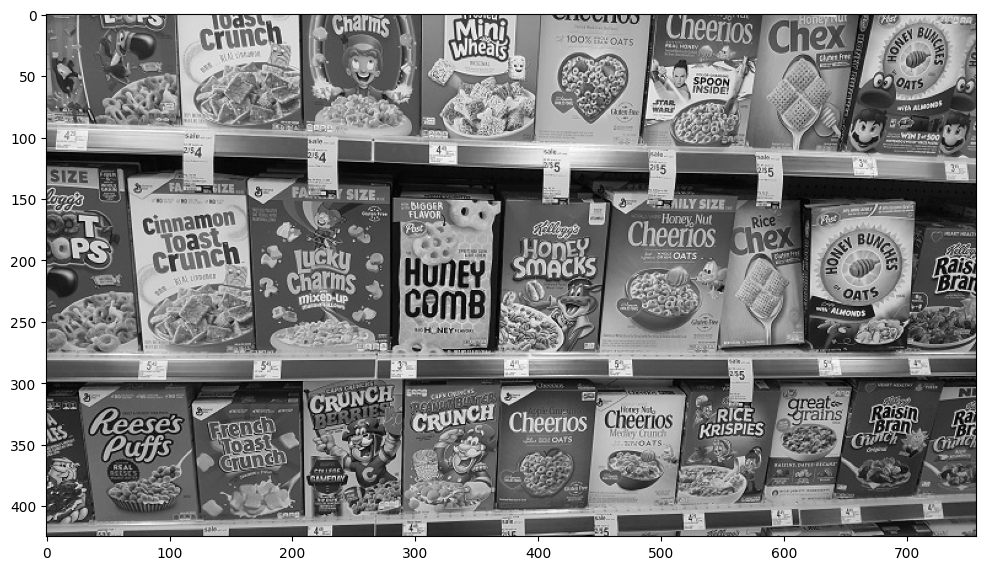

In [ ]:
cereals = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/facedet/many_cereals.jpg',0)
display(cereals)

In [ ]:
orb = cv.ORB_create()
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)
bf = cv.BFMatcher(cv.NORM_HAMMING,crossCheck = True)
matches = bf.match(des1,des2)
single_match = matches[0]
single_match.distance

71.0

In [ ]:
len(matches)

139

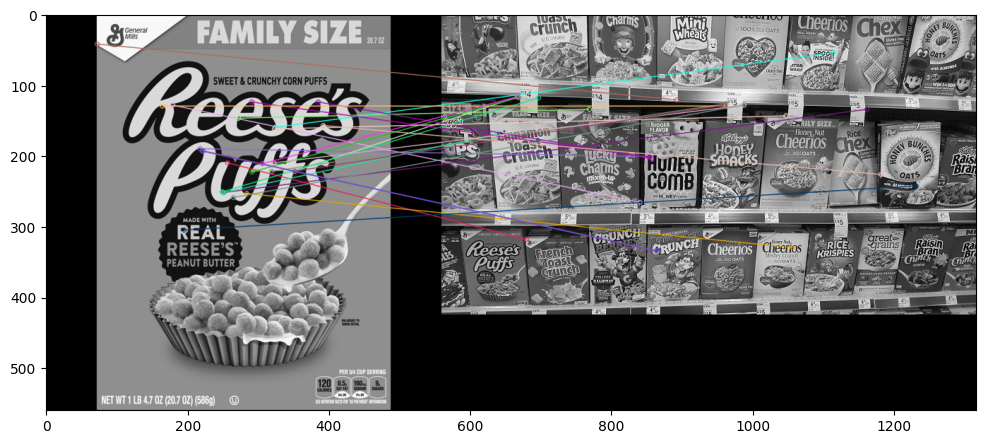

In [ ]:
matches = sorted(matches,key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match)

In [ ]:
#!pip install opencv-contrib-python==4.4.0.44

In [ ]:
sift = cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

#Makin kecil jarak makin cocok
#ratio match < 75% Match2
for match1,match2 in matches:
  #jika jarak match1 lebih kecil dari jarak 75% match2
  #description disimpan
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [ ]:
len(matches)

1501

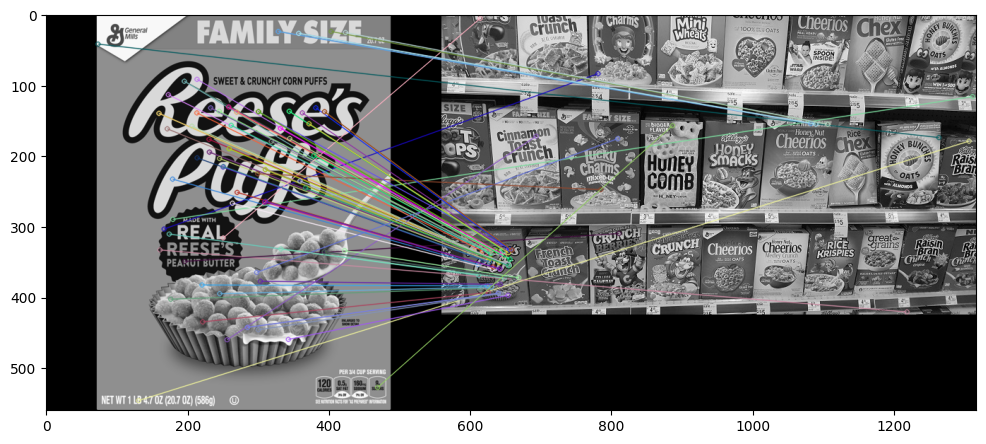

In [ ]:
sift_matches = cv.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(sift_matches)

**C.2 Konsep Face Detection**

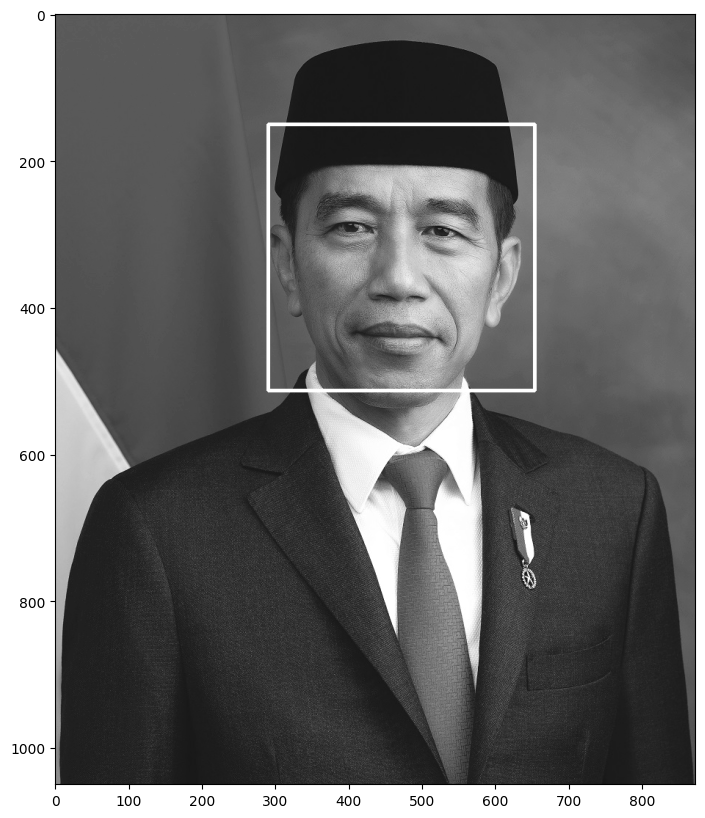

In [14]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/haarcascades/haarcascade_frontalface_alt.xml')

jokowi = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/facedet/jokowi.jpg',0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi, (x,y), (x+w,y+h), (255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

**D. Tugas Praktikum**

**Catatan:** Untuk gambar pada praktikum ini menggunakan gambar pada link berikut:

[Dataset](https://drive.google.com/drive/folders/1d4U8FVnQ0Hq_K1Sy4XJvQsgq12ZjvmgK?usp=shari)

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama “Week12.ipynb”. Kemudian import  beberapa library dan akses folder yang ada di Drive Anda dengan seperti biasa.

2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet). Tampilkan seperti pada contoh berikut.

<Figure size 1000x1000 with 0 Axes>

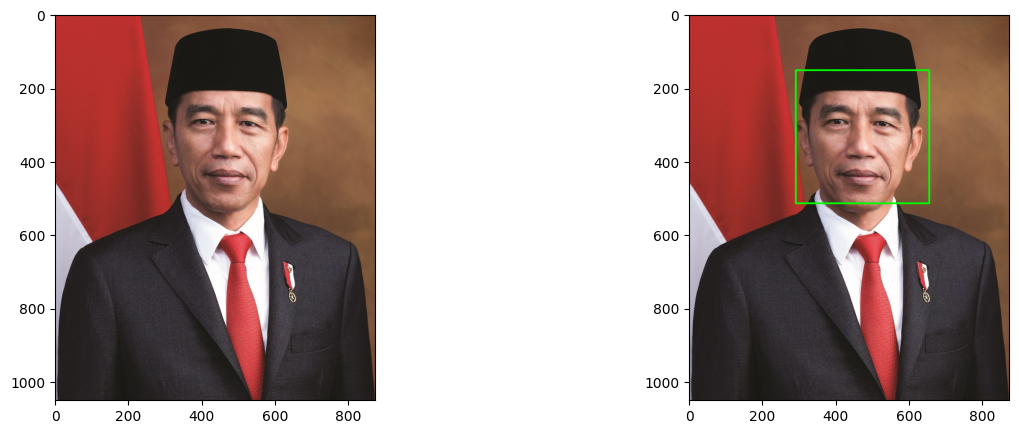

<Figure size 1000x1000 with 0 Axes>

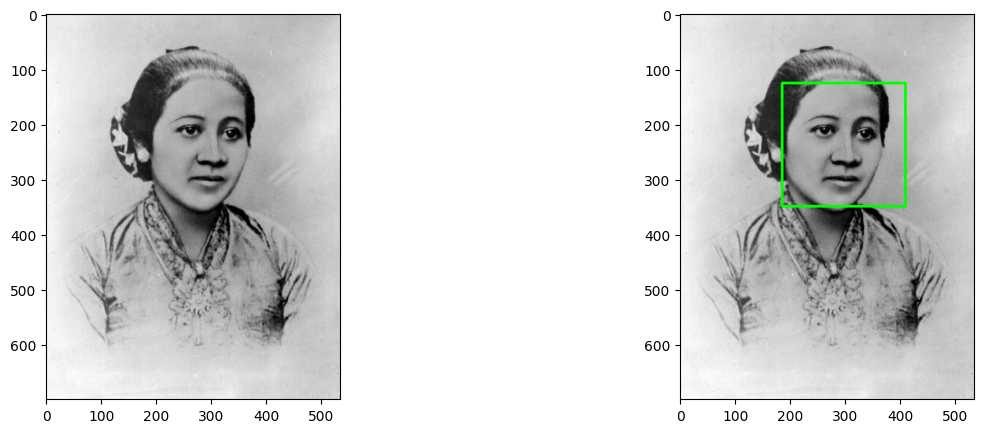

<Figure size 1000x1000 with 0 Axes>

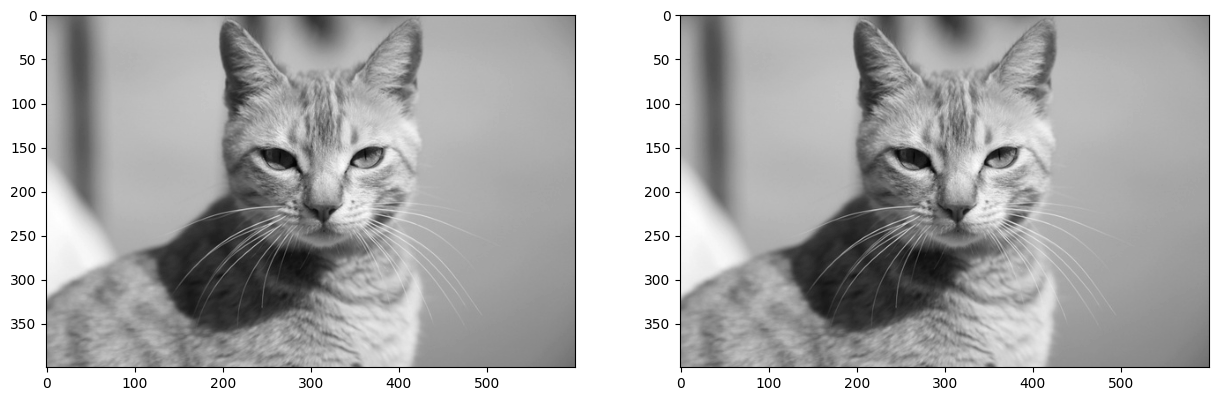

<Figure size 1000x1000 with 0 Axes>

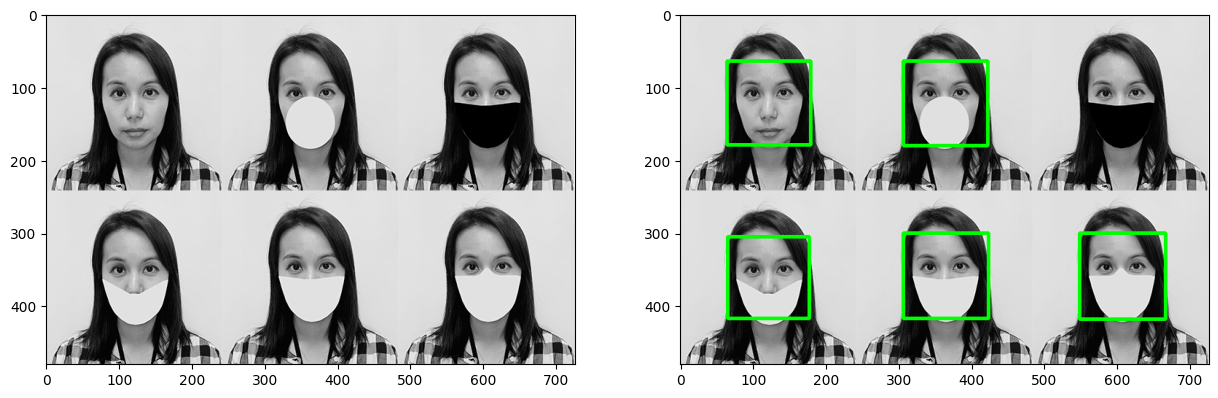

<Figure size 1000x1000 with 0 Axes>

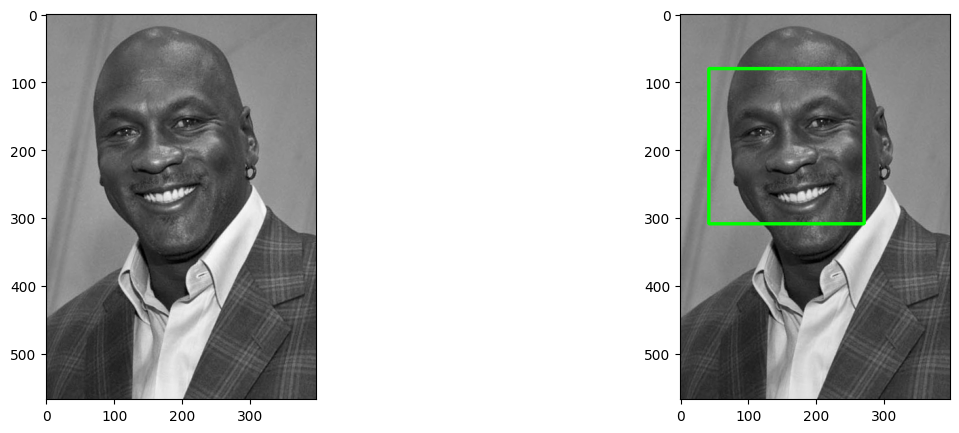

<Figure size 1000x1000 with 0 Axes>

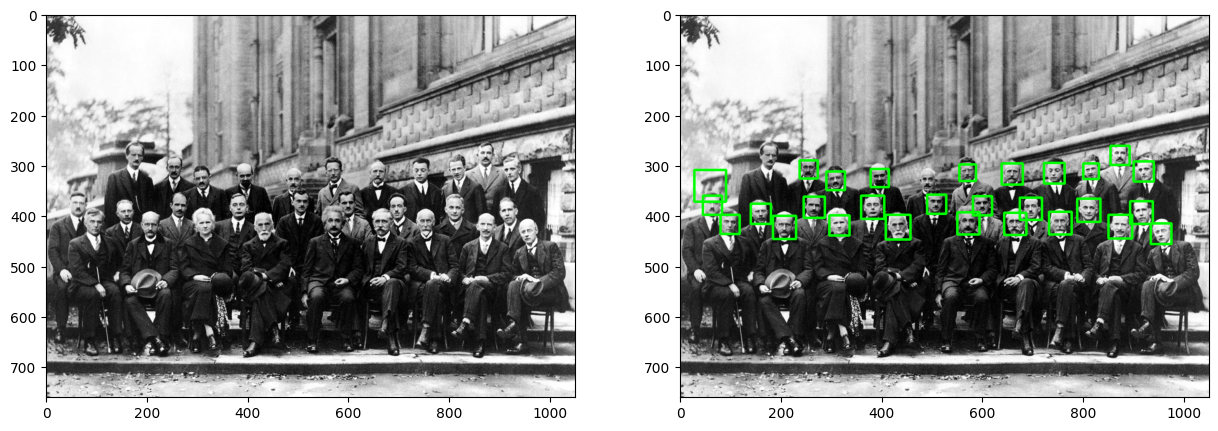

In [21]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/haarcascades/haarcascade_frontalface_alt.xml')

# Jokowi
jokowi = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/facedet/jokowi.jpg')
jokowi1 = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/facedet/jokowi.jpg')

roi_wajah1 = cascade_wajah.detectMultiScale(jokowi1)

roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
 cv.rectangle(jokowi,(x,y),(x+w,y+h),(0,255,0),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(jokowi1, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(jokowi1, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cv.cvtColor(jokowi, cv.COLOR_BGR2RGB))
axarr[1].imshow(cv.cvtColor(jokowi, cv.COLOR_BGR2RGB))
plt.show()

# RA.Kartini
kartini = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/facedet/kartini.jpg')
kartini1 = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/facedet/kartini.jpg')
roi_wajah1 = cascade_wajah.detectMultiScale(kartini1)

roi_wajah = cascade_wajah.detectMultiScale(kartini)
for(x,y,w,h) in roi_wajah:
 cv.rectangle(kartini,(x,y),(x+w,y+h),(0,255,0),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(kartini1, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(kartini1, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cv.cvtColor(kartini, cv.COLOR_BGR2RGB))
axarr[1].imshow(cv.cvtColor(kartini, cv.COLOR_BGR2RGB))
plt.show()

# Kucing
kucing = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/facedet/mycat.jpg')
kucing1 = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/facedet/mycat.jpg')

kucing_ori = cv.cvtColor(kucing, cv.COLOR_BGR2GRAY)
kucing_ori1 = cv.cvtColor(kucing1, cv.COLOR_BGR2GRAY)

roi_wajah = cascade_wajah.detectMultiScale(kucing1)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(kucing1,(x,y),(x+w,y+h),(0,255,0),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(kucing_ori, cmap='gray')
plt.subplot(122),plt.imshow(kucing_ori1, cmap='gray')
plt.show()

# Perempuan
mask = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/facedet/mask.png', 0)
mask1 = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/facedet/mask.png', 0)

roi_wajah = cascade_wajah.detectMultiScale(mask1)

mask1_rgb = cv.cvtColor(mask1,cv.COLOR_GRAY2RGB)

for(x,y,w,h) in roi_wajah:
 cv.rectangle(mask1_rgb,(x,y),(x+w,y+h),(0,255,0),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(mask, cmap='gray')
plt.subplot(122),plt.imshow(mask1_rgb)
plt.show()

# M. Jordan
jordan = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/facedet/mjordan.jpg', 0)
jordan1 = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/facedet/mjordan.jpg', 0)

roi_wajah = cascade_wajah.detectMultiScale(jordan1)

jordan1_rgb = cv.cvtColor(jordan1,cv.COLOR_GRAY2RGB)

for(x,y,w,h) in roi_wajah:
 cv.rectangle(jordan1_rgb,(x,y),(x+w,y+h),(0,255,0),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(jordan, cmap='gray')
plt.subplot(122),plt.imshow(jordan1_rgb)
plt.show()

# Kelompok
kelompok = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/facedet/solvayconf.jpg', 0)
kelompok1 = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/facedet/solvayconf.jpg', 0)

roi_wajah = cascade_wajah.detectMultiScale(kelompok1)

kelompok1_rgb = cv.cvtColor(kelompok1,cv.COLOR_GRAY2RGB)

for(x,y,w,h) in roi_wajah:
 cv.rectangle(kelompok1_rgb,(x,y),(x+w,y+h),(0,255,0),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(kelompok, cmap='gray')
plt.subplot(122),plt.imshow(kelompok1_rgb)
plt.show()

Perhatikan pada hasil face detection diatas. Secara keseluruhan, face detection dapat dilakukan dengan baik, bahkan untuk image berupa gambar bukan foto, wajah bermasker, atau wajah yang berukuran kecil (solvay).

3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.

<Figure size 1000x1000 with 0 Axes>

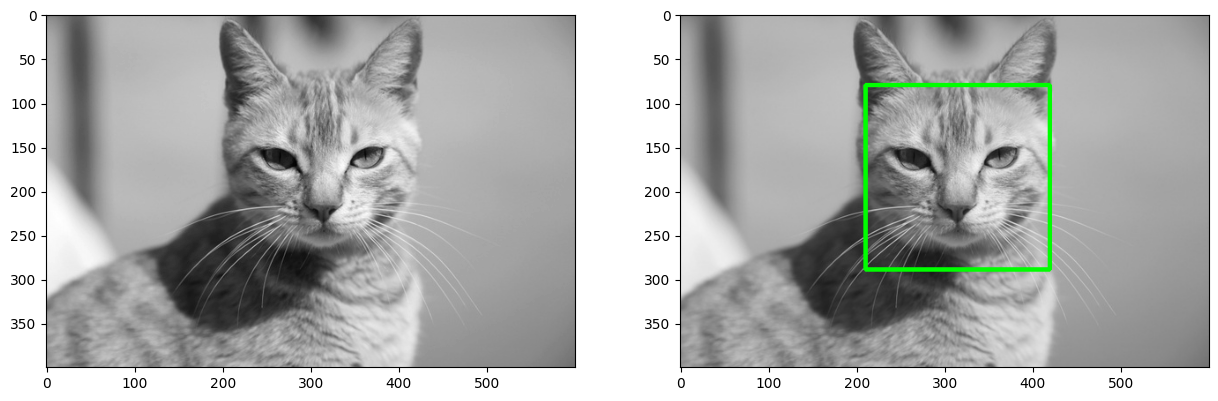

In [22]:
cascade_kucing = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalcatface.xml")

mycat = cv.cvtColor(kucing_ori1, cv.COLOR_GRAY2RGB)

roi_wajah = cascade_kucing.detectMultiScale(kucing_ori1)

for(x, y, w, h) in roi_wajah:
  cv.rectangle(mycat, (x, y), (x+w, y+h), (0, 255, 0), 3)

plt.figure(figsize = (10, 10))
f, axarr = plt.subplots(1, 2, figsize = (15, 8))
plt.subplot(121), plt.imshow(kucing_ori, cmap = 'gray')
plt.subplot(122), plt.imshow(mycat)
plt.show()
plt.show()

4. Cobakan juga untuk eyes detection.

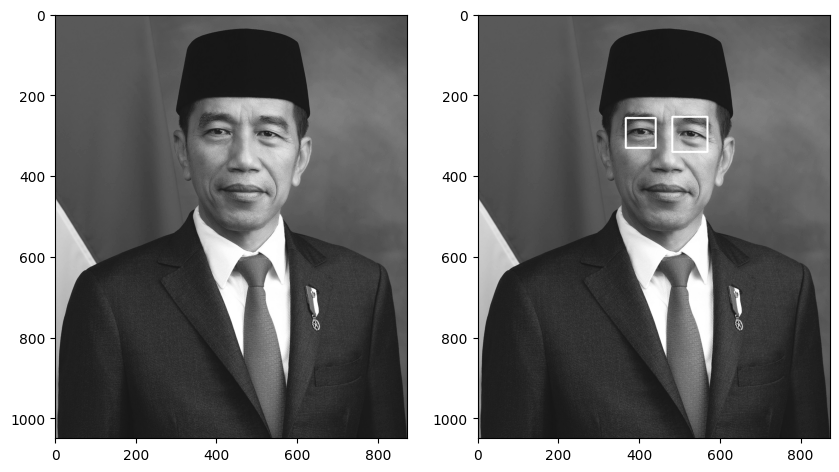

In [23]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/haarcascades/haarcascade_eye.xml')

jokowi = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/facedet/jokowi.jpg')
jokowi_ori = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/facedet/jokowi.jpg')
jokowi_gray = cv.cvtColor(jokowi, cv.COLOR_BGR2GRAY)
jokowi_ori_gray = cv.cvtColor(jokowi_ori, cv.COLOR_BGR2GRAY)

roi_wajah = cascade_wajah.detectMultiScale(jokowi_gray)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi_gray,(x,y),(x+w,y+h),(255,0,0),3)

# Plot outputs
f, axarr = plt. subplots(1,2,figsize=(10,10))
plt.subplot(121),plt.imshow(jokowi_ori_gray, cmap='gray')
plt.subplot(122),plt.imshow(jokowi_gray, cmap='gray')
plt.show()

5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link berikut: https://www.youtube.com/watch?v=YjWh7QvVH60


In [24]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [25]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [26]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

In [27]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

NotAllowedError: Permission dismissed


6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

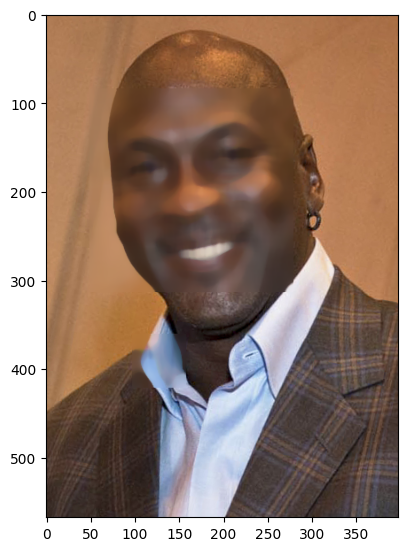

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Fungsi untuk mendeteksi wajah menggunakan OpenCV Haarcascades
def detect_faces(image_path):
    # Baca gambar
    image = cv2.imread(image_path)
    # Konversi gambar ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Inisialisasi Haar Cascade untuk deteksi wajah
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Deteksi wajah pada gambar
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    return faces, image

# Fungsi untuk melakukan blurring pada bagian wajah
def blur_faces(image, faces):
    for (x, y, w, h) in faces:
        # Ambil ROI (Region of Interest) pada wajah
        face_roi = image[y:y+h, x:x+w]

        # Lakukan blurring menggunakan cv2.medianBlur
        blurred_face = cv2.medianBlur(face_roi, 15)

        # Ganti bagian wajah pada gambar asli dengan wajah yang sudah di-blur
        image[y:y+h, x:x+w] = blurred_face

    return image

# Path gambar input
image_path = '/content/drive/MyDrive/facedet/mjordan.jpg'

# Deteksi wajah
faces, original_image = detect_faces(image_path)

# Blurring wajah
blurred_image = blur_faces(original_image, faces)

# Tampilkan gambar asli dan hasil blurring
plt.figure(figsize=(10, 10))


plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))

plt.show()

Lakukan deteksi bagian wajah gambar “mjordan.jpg”, kemudian tindih bagian wajah tersebut
dengan gambar “smile.png”. Berikut contoh keluarannya.

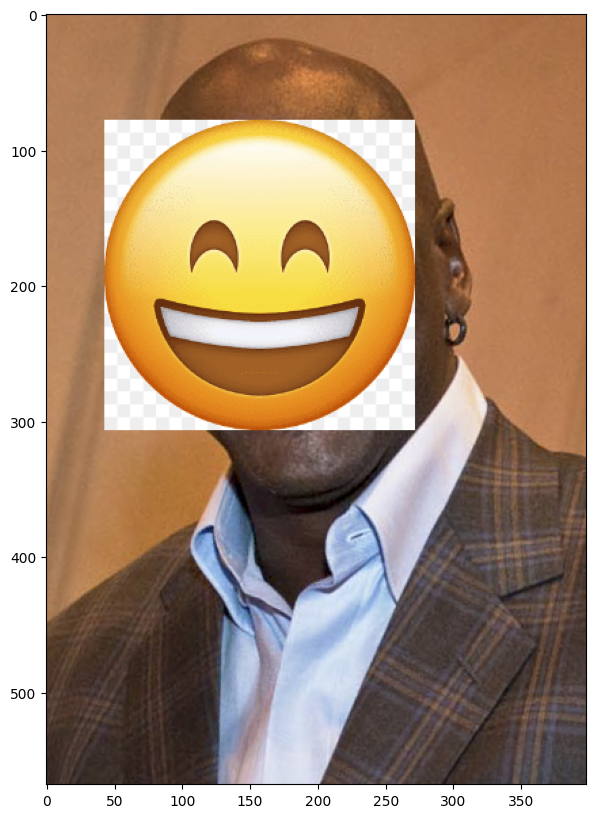

In [31]:
mjordan = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/facedet/mjordan.jpg',1)
mjordan = cv.cvtColor(mjordan,cv.COLOR_BGR2RGB)
copy_wajah = mjordan.copy()
smile = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/facedet/smile.png',1)
smile = cv.cvtColor(smile,cv.COLOR_BGR2RGB)

roi_wajah = cascade_wajah.detectMultiScale(mjordan)

for(x,y,w,h) in roi_wajah:
  copy_wajah = copy_wajah[y:y+h,x:x+w]
  # blur_wajah = cv.medianBlur(copy_wajah,15)
  smile_copy = cv.resize(smile, (w, h))
  mjordan[y:y+h,x:x+w] = smile_copy
plt.figure(figsize = (10,10))
plt.imshow(mjordan, cmap='gray')

7. Lakukan deteksi wajah dengan menggunakan bounding box berwarna hitam, deteksi mata
menggunakan bounding box berwarna putih, dan deteksi mata kanan menggunakan bounding box
berwarna merah. Gunakan gambar “people.jpg” untuk mengerjakan soal pada nomor ini. Berikut
contoh keluarannya.

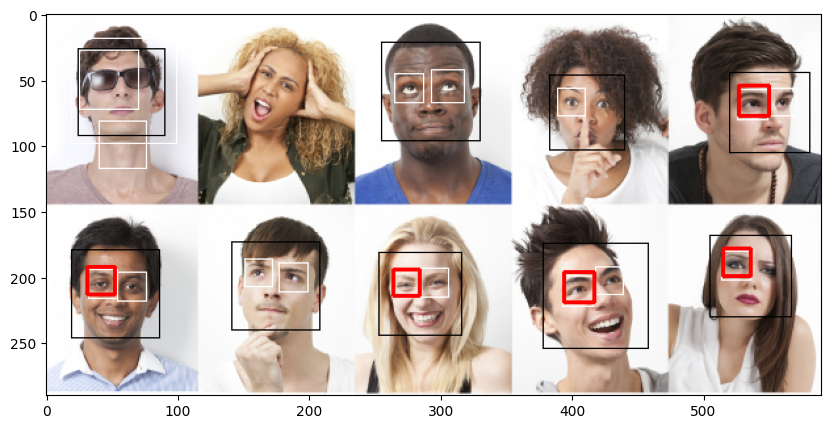

In [32]:
from matplotlib.colors import ColorConverter
cascade_mata = cv.CascadeClassifier('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/haarcascades/haarcascade_eye.xml')
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/haarcascades/haarcascade_frontalface_alt.xml')
cascade_mata_kanan = cv.CascadeClassifier('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/haarcascades/haarcascade_righteye_2splits.xml')
ppl=[]
ppl = plt.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/facedet/people.jpg',1)

roi_mata = cascade_mata.detectMultiScale(ppl)
roi_wajah = cascade_wajah.detectMultiScale(ppl)
roi_smile = cascade_mata_kanan.detectMultiScale(ppl)
for(x,y,w,h) in roi_mata:
  cv.rectangle(ppl,(x,y),(x+w,y+h),(255,255,255),1)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(ppl,(x,y),(x+w,y+h),(0,0,0),1)
for(x,y,w,h) in roi_smile:
  cv.rectangle(ppl,(x,y),(x+w,y+h),(255,0,0),2)
plt.figure(figsize = (10,10))
plt.imshow(ppl)

Segmentasi Karakter pada KTP

(-0.5, 492.5, 299.5, -0.5)

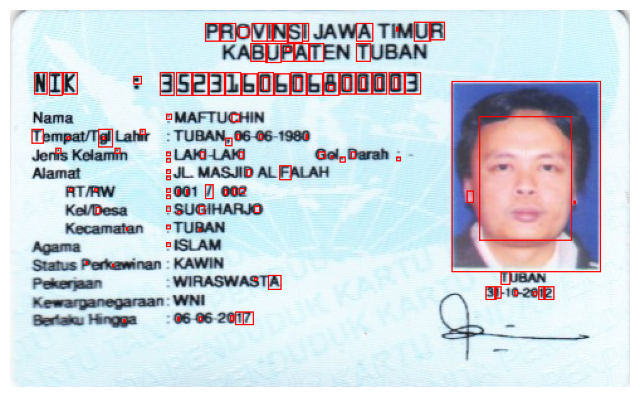

In [33]:
import cv2
import os

# load data
img = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/ktp4.png')
blurred = cv.GaussianBlur(img, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(8,5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')

8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

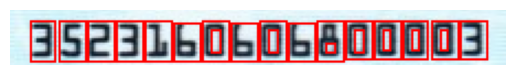

In [34]:
cropped_nik = img[45:70, 110:335]

plt.imshow(cv.cvtColor(cropped_nik, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

9. Deep Learning untuk melakukan pengenalan karakter

In [35]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam

# Load dataset MNIST
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Jumlah data yang ingin diambil dari setiap kategori
num_samples_per_class = 100

# List digit yang akan diambil (0 sampai 9)
digits_to_extract = list(range(10))

# Fungsi untuk mengambil sampel dari setiap kategori
def extract_samples(X, y, digits, num_samples):
    samples = []
    for digit in digits:
        digit_indices = np.where(y == digit)[0]
        selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
        samples.extend([(X[i], digit) for i in selected_indices])
    return samples

# Ambil sampel dari setiap kategori
training_data = extract_samples(X_train, y_train, digits_to_extract, num_samples_per_class)

# Acak urutan data
np.random.shuffle(training_data)

# Pisahkan fitur dan label
X, Y = zip(*training_data)

# Konversi menjadi numpy array
X = np.array(X).reshape(-1, 28, 28, 1)

# Tulis ke file pickle
pickle_out = open("X_mnist.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y_mnist.pickle", "wb")
pickle.dump(to_categorical(Y, num_classes=10), pickle_out)
pickle_out.close()

11490434/11490434 [==============================] - 0s 0us/step


10. Lakukan Training Data

In [36]:
# Load file pickle
pickle_in = open("X_mnist.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y = pickle.load(pickle_in)

width, height = 28, 28  # Sesuaikan dengan ukuran gambar MNIST

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(10, activation='softmax')(fc_layer)

adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=20, verbose=1)
model.save('anpr.model')

Epoch 1/20
32/32 [==============================] - 3s 53ms/step - loss: 4.9007 - accuracy: 0.2450
Epoch 2/20
32/32 [==============================] - 2s 75ms/step - loss: 1.2990 - accuracy: 0.6120
Epoch 3/20
32/32 [==============================] - 2s 75ms/step - loss: 0.7889 - accuracy: 0.7580
Epoch 4/20
32/32 [==============================] - 2s 66ms/step - loss: 0.5524 - accuracy: 0.8290
Epoch 5/20
32/32 [==============================] - 2s 62ms/step - loss: 0.3943 - accuracy: 0.8760
Epoch 6/20
32/32 [==============================] - 1s 29ms/step - loss: 0.2807 - accuracy: 0.9200
Epoch 7/20
32/32 [==============================] - 1s 28ms/step - loss: 0.1959 - accuracy: 0.9520
Epoch 8/20
32/32 [==============================] - 1s 29ms/step - loss: 0.1483 - accuracy: 0.9670
Epoch 9/20
32/32 [==============================] - 1s 29ms/step - loss: 0.1036 - accuracy: 0.9760
Epoch 10/20
32/32 [==============================] - 1s 29ms/step - loss: 0.0759 - accuracy: 0.9910
Epoch 11/

11. Testing Data

32/32 [==============================] - 1s 10ms/step - loss: 2.2549 - accuracy: 0.9990
Accuracy on the test set: 99.90%


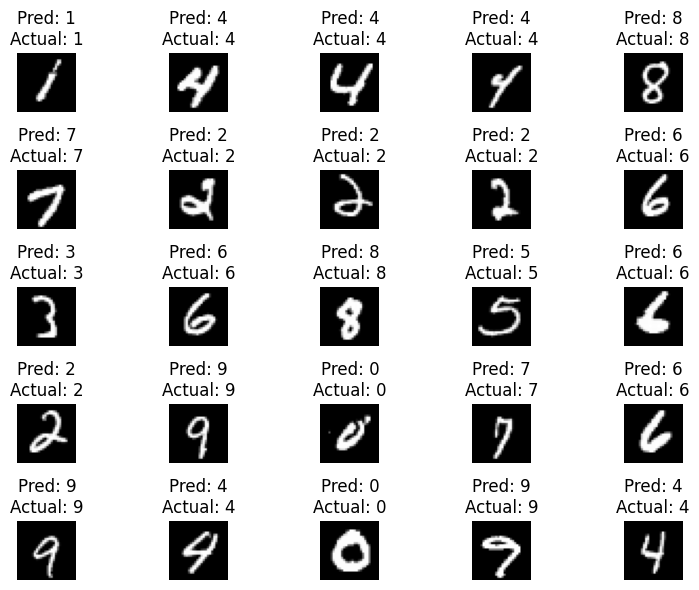

In [ ]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load dataset MNIST yang sudah disiapkan sebelumnya
pickle_in = open("X_mnist.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalisasi data testing
X_test = X_test / 255.0

# Load model yang sudah di-training sebelumnya
model = tf.keras.models.load_model("anpr.model")

# Lakukan prediksi pada data testing
predictions = model.predict(X_test)

# Evaluasi performa model
accuracy = model.evaluate(X_test, Y_test)[1]
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

# Tampilkan 25 hasil uji dengan gambarnya
num_results_to_display = 25
fig, axes = plt.subplots(5, 5, figsize=(8, 6))  # Sesuaikan ukuran subplot dengan jumlah gambar yang ingin ditampilkan

for i in range(num_results_to_display):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(Y_test[i])

    # Ambil gambar dari data testing
    img = X_test[i].reshape((28, 28))

    # Tampilkan gambar dan label
    axes[i // 5, i % 5].imshow(img, cmap='gray')
    axes[i // 5, i % 5].set_title(f'Pred: {predicted_label}\nActual: {actual_label}')
    axes[i // 5, i % 5].axis('off')

plt.tight_layout()
plt.show()

**Tugas**

Silakan melakukan pengenalan NIK pada e-KTP yang terdapat pada tugas modul 11!

(-0.5, 799.5, 487.5, -0.5)

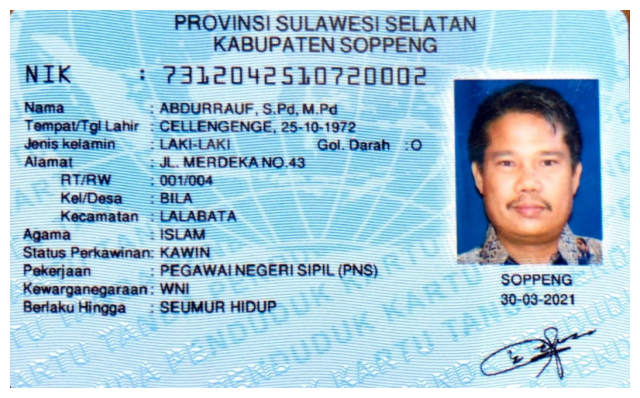

In [ ]:
import cv2
import os

# load data
img = cv.imread('/content/drive/MyDrive/KTP/ktp7.png')

plt.figure(figsize=(8,5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')

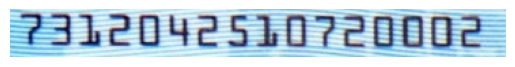

In [ ]:
cropped_nikabdur = img[70:105, 190:555]

plt.imshow(cv.cvtColor(cropped_nikabdur, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [ ]:
import pytesseract
import imutils
import cv2

In [ ]:
# Baca gambar e-KTP (pastikan gambar e-KTP sudah diunduh atau sesuaikan dengan path yang benar)
image_path = '/content/drive/MyDrive/KTP/ktp7-abdur.png'

# Baca gambar dengan OpenCV
img = cv2.imread(image_path)

# Konversi gambar ke skala abu-abu
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Lakukan thresholding (sesuaikan dengan kebutuhan)
_, threshed = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Gunakan Tesseract untuk melakukan OCR pada gambar
result = pytesseract.image_to_string(PIL.Image.fromarray(threshed), lang="ind")

# Cetak hasil pengenalan NIK
print("NIK pada e-KTP:", result)

NIK pada e-KTP: ?322012510720002

